In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Problem 3: Google Playstore Apps Dataset (63 points)
Given an Excel data file as represented by the sample file GooglePlaystore.xlsx (10K records), load it into a
Pandas DataFrame (use the Pandas read_excel method), and perform the following tasks on it.

Preprocessing (28 pts)
1. [3 pts] Often there are outliers which do not match the overall data type. There is one record in this
data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that
record.


In [65]:
apps = pd.read_excel('GooglePlaystore.xlsx')

index = apps[apps['Reviews'] == '3.0M'].index[0]
apps.drop(index, inplace=True)
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0.0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0.0,Everyone,Education,2018-07-06 00:00:00,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5M,"1,000+",Free,0.0,Everyone,Medical,2017-01-20 00:00:00,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0.0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


2. [4 pts] Remove rows where any of the columns has the value "Varies with device".


In [66]:
for row in apps.iterrows():
    ser = row[1]
    for i,col in enumerate(ser.index):
        if ser.values[i] == 'Varies with device':
            apps.drop(row[0], inplace = True)
            break

apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,"50,000+",Free,0.0,Everyone,Art & Design,2017-03-26 00:00:00,1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500+,Free,0.0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0.0,9.6M,10+,Free,0.0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0.0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0.0,Everyone,Education,2018-07-06 00:00:00,1.0,4.1 and up


3. [5 pts] The values in the Android version column should be floats. Strip the trailing non-numeric
characters from all values (ie. the words " and up"), so the result is a number. If there are multiple
decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and
up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value
"5.6.7" should be changed to "5.6".
If there is a range (eg. 5.0 - 8.0), only consider the first number. For example, the value "5.0 - 8.0"
should be changed to "5.0". The value "4.0.3 - 7.1.1" should be changed to "4.0".

In [67]:
apps['Android Ver'] = apps['Android Ver'].str.extract('^(\d+\.\d+)')
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,"50,000+",Free,0.0,Everyone,Art & Design,2017-03-26 00:00:00,1.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500+,Free,0.0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0.0,9.6M,10+,Free,0.0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0.0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0.0,Everyone,Education,2018-07-06 00:00:00,1.0,4.1


4. [5 pts] The "Installs" column must have integer values. For values that have commas, remove the
commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an
integer value after these edits.


In [68]:
def formatting(x):
    x = x.replace(',','')
    if x[-1] == '+':
        x = x[:-1]
    if not x.isdigit():
        x = -1
    return x

apps['Installs'] = apps['Installs'].apply(formatting)
apps = apps[apps['Installs'] != -1]
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,50000,Free,0.0,Everyone,Art & Design,2017-03-26 00:00:00,1.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500,Free,0.0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0.0,9.6M,10,Free,0.0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,5000,Free,0.0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100,Free,0.0,Everyone,Education,2018-07-06 00:00:00,1.0,4.1


5. [5 pts] For missing rating values, if the number of reviews is less than 100 and installations is less
than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal
places) for the Category of that row.


In [104]:
apps = apps[(apps['Reviews'] >= 100) | (apps['Installs'].astype(int) >= 50000)]

meanByCat = apps.groupby('Category').mean().round(2)['Rating']
for (rowName, rowData) in apps.iterrows():
    if np.isnan(rowData['Rating']):
        apps.loc[rowName,'Rating'] = meanByCat[rowData['Category']]


6. [6 pts] Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into
integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.


In [105]:
def convertSizes(x):
    if type(x) == int:
        return x
    if x[-1] == 'M' or x[-1] == 'm':
        x = float(x[:-1])*1000000
        return int(x)
    elif x[-1] == 'K' or x[-1] == 'k':
        x = float(x[:-1])*1000
        return int(x)
    
    return x
    

apps['Size'] = apps['Size'].apply(convertSizes)
apps


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600000,50000,Free,0.0,Everyone,Art & Design,2017-03-26 00:00:00,1.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10827,Fr Agnel Ambarnath,FAMILY,4.2,117.0,13000000,5000,Free,0.0,Everyone,Education,2018-06-13 00:00:00,2.0.20,4.0
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291.0,13000000,10000,Free,0.0,Everyone,Comics,2017-05-15 00:00:00,2.0.1,4.0
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603.0,7400000,10000,Free,0.0,Everyone,Books & Reference,2016-06-19 00:00:00,2.96,4.1
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881.0,2300000,100000,Free,0.0,Everyone,News & Magazines,2014-01-20 00:00:00,1.5,1.6


<b> Analysis (19 pts) </b>

For the following tasks, do preprocessing or changing of data types in the data frame as required.

1. [4 pts] Describe (use DataFrame describe method) the category wise rating statistics. In other
words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.


In [135]:
apps.groupby('Category').describe()

Rating                                                      Size                                                                                         
                      count      mean       std  min    25%   50%    75%  max   count          mean           std        min          25%         50%         75%          max
Category                                                                                                                                                                      
ART_AND_DESIGN         51.0  4.358039  0.329296  3.4  4.100  4.40  4.700  4.8    51.0  1.305098e+07  9.846509e+06  1200000.0   5550000.00   9200000.0  19500000.0   39000000.0
AUTO_AND_VEHICLES      45.0  4.280000  0.389405  3.2  4.000  4.30  4.600  4.9    45.0  1.891558e+07  1.612755e+07   201000.0   4500000.00  16000000.0  33000000.0   57000000.0
BEAUTY                 28.0  4.383571  0.311130  3.7  4.175  4.40  4.625  4.9    28.0  1.881429e+07  1.434627e+07  2600000.0   7999999.25  15500000.0  24250000.0   57000000.0
BOOKS_AND_REFERENCE   100.0  4.399000  0.357176  3.3  4.200  4.50  4.700  4.9   100.0  1.570593e+07  1.668166e+07    93000.0   4975000.00   9300000.0  21000000.0   85000000.0
BUSINESS              137.0  4.195620  0.415308  2.7  4.100  4.30  4.500  4.8   137.0  1.591602e+07  1.343997e+07    23000.0   5400000.00  11000000.0  24000000.0   55000000.0
COMICS                 42.0  4.129286  0.514779  3.2  3.725  4.35  4.500  4.8    42.0  1.372745e+07  1.100478e+07   444000.0   5100000.00  10000000.0  19750000.0   40000000.0
COMMUNICATION         155.0  4.142839  0.372924  2.3  4.000  4.20  4.400  4.8   155.0  1.439120e+07  1.503093e+07    17000.0   3150000.00   9500000.0  20000000.0   66000000.0
DATING                132.0  3.980909  0.569064  1.9  3.800  4.10  4.400  4.9   132.0  1.970455e+07  1.545207e+07  1400000.0   7725000.00  15000000.0  27000000.0   77000000.0
EDUCATION             108.0  4.385093  0.250161  3.5  4.275  4.40  4.600  4.9   108.0  2.027576e+07  1.959320e+07   526000.0   6575000.00  18000000.0  21250000.0   97000000.0
ENTERTAINMENT          86.0  4.145349  0.291308  3.0  4.000  4.20  4.300  4.7    86.0  2.226512e+07  1.616812e+07  3300000.0  12000000.00  19000000.0  24750000.0   78000000.0
EVENTS                 21.0  4.340000  0.247790  3.7  4.200  4.40  4.500  4.7    21.0  1.126190e+07  8.367406e+06  2600000.0   5100000.00   8900000.0  14000000.0   27000000.0
FAMILY               1200.0  4.179100  0.422370  1.6  4.000  4.30  4.500  5.0  1200.0  3.437655e+07  2.715363e+07   196000.0  10750000.00  27000000.0  52000000.0  100000000.0
FINANCE               189.0  4.154497  0.525765  2.0  4.000  4.30  4.500  5.0   189.0  2.163511e+07  1.956896e+07    70000.0   6500000.00  16000000.0  30000000.0  100000000.0
FOOD_AND_DRINK         76.0  4.136579  0.421608  2.9  3.800  4.20  4.500  4.8    76.0  2.488421e+07  1.583268e+07  1700000.0  13000000.00  19500000.0  35000000.0   76000000.0
GAME                  877.0  4.278312  0.320794  2.3  4.100  4.30  4.500  4.9   877.0  4.720018e+07  2.748728e+07   116000.0  24000000.00  45000000.0  68000000.0  100000000.0
HEALTH_AND_FITNESS    177.0  4.275141  0.540573  2.0  4.100  4.50  4.600  4.9   177.0  2.651072e+07  2.383425e+07   226000.0   6900000.00  19000000.0  41000000.0  100000000.0
HOUSE_AND_HOME         56.0  4.181429  0.332524  3.4  4.000  4.20  4.425  4.8    56.0  1.703750e+07  1.629586e+07  1900000.0   7500000.00  12000000.0  19000000.0   77000000.0
LIBRARIES_AND_DEMO     45.0  4.189778  0.345619  3.1  4.100  4.20  4.400  4.7    45.0  1.692528e+07  2.242940e+07     8500.0   2400000.00   9400000.0  21000000.0   99000000.0
LIFESTYLE             185.0  4.028973  0.598079  1.6  3.800  4.10  4.500  5.0   185.0  1.843115e+07  1.863060e+07    74000.0   5500000.00  13000000.0  25000000.0  100000000.0
MAPS_AND_NAVIGATION    66.0  4.086364  0.525617  1.9  3.900  4.25  4.400  4.8    66.0  1.974509e+07  1.771168e+07   676000.0   6450000.00  14500000.0  26000000.0   7800000

2. [11 pts] Extract all "Free" apps from the master data frame. Then write a function that, given a
numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each
category based on that column. Call the function on each of these columns:

a. Rating (gives top 3 most highly rated applications in each category)

b. Installs (gives top 3 most installed applications in each category)

c. Reviews (gives top 3 most reviewed applications in each category)

You don't need to do anything explicit to break ties.
Each of the returned dataframes have Category and App for the first two columns, and one of Rating
(for a.), Installs (for b.), and Reviews (for c.) as the third column, as for instance:


In [134]:
def topThree(columnName):
    freeApps = apps[apps['Type'] == 'Free']
    freeApps = freeApps.sort_values(columnName, ascending = False).head(3)
    freeApps = freeApps[['Category','App',columnName]]
    return freeApps
    
topRated = topThree('Rating')

topInstalled = topThree('Installs')

topReviewed = topThree('Reviews')

print(topRated)

print(topInstalled)

print(topReviewed)


        Category                             App  Rating
6823      FAMILY  Barisal University App-BU Face     5.0
10357  LIFESTYLE                      Ríos de Fe     5.0
8058   LIFESTYLE                      Oración CX     5.0
           Category                                          App   Installs
4041           GAME                                 Temple Run 2  500000000
383   COMMUNICATION                imo free video calls and chat  500000000
3971  COMMUNICATION  UC Browser - Fast Download Private & Secure  500000000
     Category             App     Reviews
1879     GAME  Clash of Clans  44893888.0
1670     GAME  Clash of Clans  44891723.0
1704     GAME  Clash of Clans  44891723.0


3. [4 pts] Find the average, maximum and minimum price of the paid applications.


In [128]:
paidApps = apps[apps['Type'] == 'Paid']['Price']

print("The maximum price is : ",paidApps.max())
print("The minimum price is : ",paidApps.min())
print("The average price is : ",paidApps.mean())

The maximum price is :  400.0
The minimum price is :  0.99
The average price is :  17.42122754491007


Visualization (16 pts)
1. [9 pts] In the genre column, break the string of genres into a list. For example, ‘Art & Design;
Creativity’ should be [‘Art & Design’, Creativity’].
Count the number of applications per genre and display it using a pie chart.
Hint: Read about DataFrame.explode()


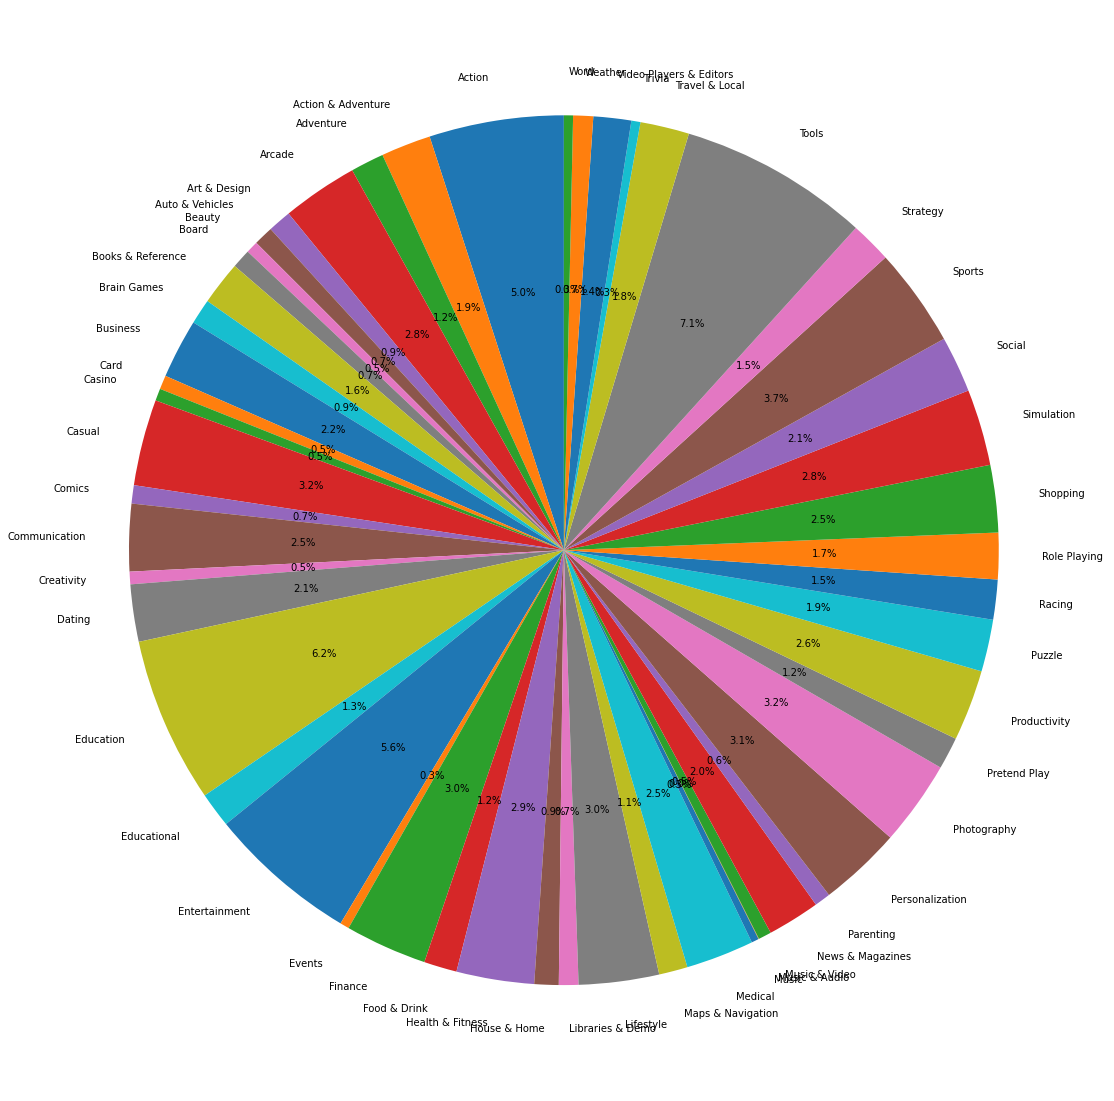

In [187]:
import matplotlib.pyplot as plt

def splitGenres(x):

    if ';' in x:
        return x.split(';')
    else:
        return x
        
        
genreList = apps['Genres'].apply(splitGenres)
genreList = genreList.explode('Genres')

genreNames = genreList.groupby(genreList).count().index.values
values = genreList.groupby(genreList).count().values

#genreList.groupby(genreList).count()

fig1, ax1 = plt.subplots()
fig1.set_figheight(20)
fig1.set_figwidth(20)
ax1.pie(values, labels=genreNames, autopct='%1.1f%%', startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



2. [7 pts] Display a box plot of ratings for "Business" and "Education" categories. The boxplots should
be in the same plot.

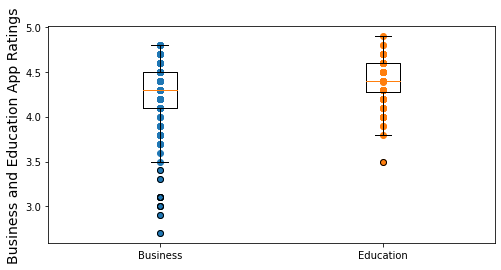

In [200]:
businessRatings = apps[apps['Category'] == 'BUSINESS']['Rating'].values

educationRatings = apps[apps['Category'] == 'EDUCATION']['Rating'].values
print()
plt.figure(figsize=(8, 4))
plt.scatter([1]*len(businessRatings), businessRatings)
plt.scatter([2]*len(educationRatings), educationRatings)
plt.boxplot([businessRatings, educationRatings],labels=('Business','Education'))
plt.ylabel('Business and Education App Ratings', fontsize=14)
plt.show()